In [31]:
import numpy as np
from scipy.stats import norm
import torch
import matplotlib.pyplot as plt
type ndarray = np.ndarray

1a 

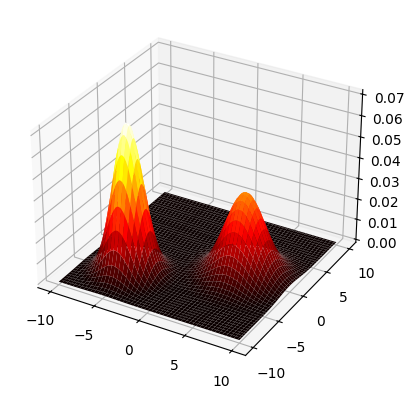

In [36]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Parameters
mu_x_1, mu_y_1 = -5, -5
sigma_1 = 1.5

mu_x_2, mu_y_2 = 5.0, 0.0
sigma_2 = 2.0


Z1 = norm.pdf(X, mu_x_1, sigma_1) * norm.pdf(Y, mu_y_1, sigma_1)
Z2 = norm.pdf(X, mu_x_2, sigma_2) * norm.pdf(Y, mu_y_2, sigma_2)
Z = Z1 + Z2


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='hot')
plt.show()

1b

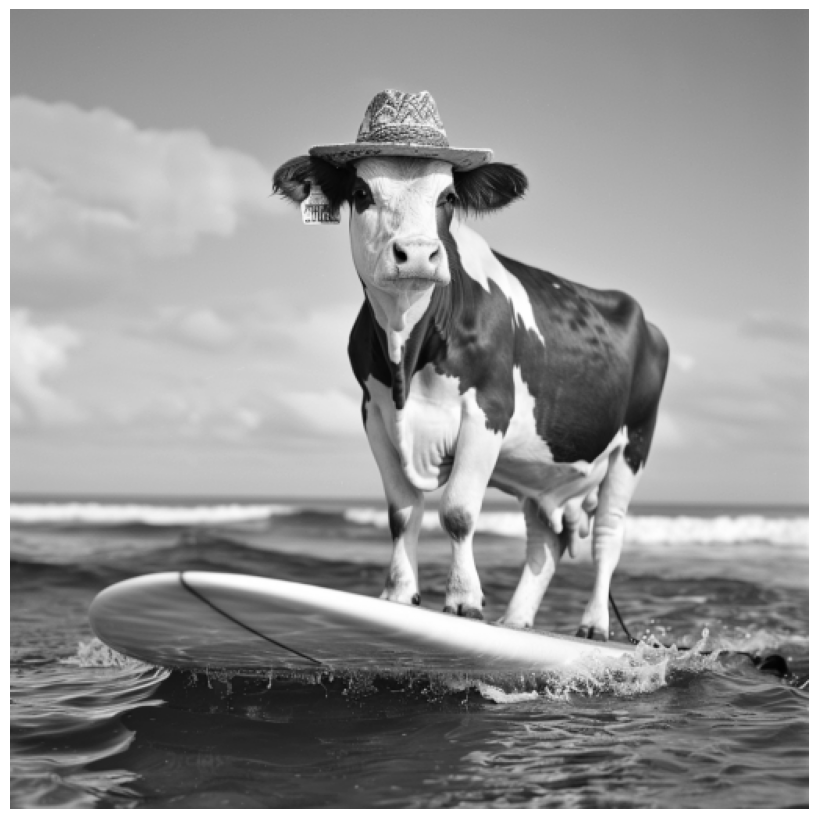

In [33]:
puzzle_img = plt.imread('resources/Shuffled Figure 1b Cow Tiles.png')

h, w = puzzle_img.shape[:2]
tile_h, tile_w = h // 4, w // 4


def fix_the_image(image: ndarray, ordering: list) -> ndarray:
    tiles = []
    for i in range(4):
        for j in range(4):
            tile = image[i*tile_h:(i+1)*tile_h, j*tile_w:(j+1)*tile_w]
            tiles.append(tile)
    
    correct_tiles = []
    for order in ordering:
        correct_tiles.append(tiles[order])
    return correct_tiles

fixed_image = fix_the_image(puzzle_img, [2,4,11, 6, 7,10, 9, 1,5,14,8,15, 3,0, 13,12])

fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for idx, tile in enumerate(fixed_image):
    row = idx // 4
    col = idx % 4
    axes[row, col].imshow(tile)
    axes[row, col].axis('off')

plt.tight_layout(pad=0)
plt.show()

1c

mask: [[ True  True False  True  True]
 [ True False False False  True]
 [False False False False False]
 [ True False False False  True]
 [ True  True False  True  True]]
mask: [[ True  True  True  True  True  True  True  True  True  True]
 [ True  True False False False False False False  True  True]
 [ True False False False False False False False False  True]
 [ True False False False False False False False False  True]
 [ True False False False False False False False False  True]
 [ True False False False False False False False False  True]
 [ True False False False False False False False False  True]
 [ True False False False False False False False False  True]
 [ True  True False False False False False False  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]
mask: [[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True False False False Fals

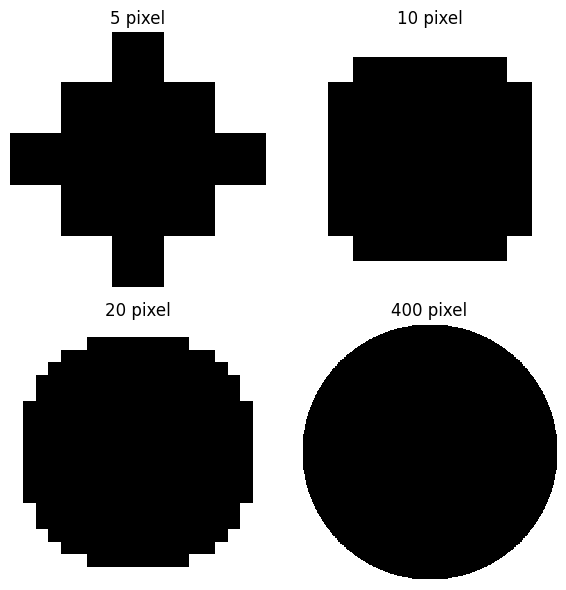

In [ ]:
def circle_mask(size):
    """Create a binary mask of a filled circle in a square array of given size."""
    y, x = np.ogrid[:size, :size]
    center = (size - 1) / 2
    mask = (x - center)**2 + (y - center)**2 > (center)**2
    print(f"mask: {mask}")
    return mask.astype(int)

sizes = [5, 10, 20, 400]
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

for ax, size in zip(axes.flat, sizes):
    mask = circle_mask(size)
    ax.imshow(mask, cmap='gray')
    ax.set_title(f"{size} pixel")
    ax.axis('off')

plt.tight_layout()
plt.show()
